# Exploring Semantic Relationships with Word Embeddings

## Setup<div class='tocSkip'/>

Set directory locations. If working on Google Colab: copy files and install required libraries.

In [2]:
import sys, os
ON_COLAB = 'google.colab' in sys.modules

if ON_COLAB:
    GIT_ROOT = 'https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master'
    os.system(f'wget {GIT_ROOT}/ch10/setup.py')

%run -i setup.py

You are working on a local system.
Files will be searched relative to "..".


## Load Python Settings<div class="tocSkip"/>

Common imports, defaults for formatting in Matplotlib, Pandas etc.

In [3]:
%run "settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

# set precision for similarity values
%precision 3 
np.set_printoptions(suppress=True) # no scientific for small numbers

# path to import blueprints packages
sys.path.append(BASE_DIR + '/packages')

# The Case for Semantic Embeddings
## Word Embeddings


## Analogy Reasoning with Word Embeddings


## Types of Embeddings


### Word2Vec


### GloVe
### FastText
### Deep Contextualized Embeddings


# Blueprint: Similarity Queries on Pre-Trained Models
## Loading a Pretrained Model


In [4]:
import os
os.environ['GENSIM_DATA_DIR'] = './models'

In [5]:
# pandas number format
pd.options.display.float_format = '{:.0f}'.format

In [6]:
import gensim.downloader as api

info_df = pd.DataFrame.from_dict(api.info()['models'], orient='index')
info_df[['file_size', 'base_dataset', 'parameters']].head(10)

,file_size,base_dataset,parameters
fasttext-wiki-news-subwords-300,1005007116,"Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)",{'dimension': 300}
conceptnet-numberbatch-17-06-300,1225497562,"ConceptNet, word2vec, GloVe, and OpenSubtitles 2016",{'dimension': 300}
word2vec-ruscorpora-300,208427381,Russian National Corpus (about 250M words),"{'dimension': 300, 'window_size': 10}"
word2vec-google-news-300,1743563840,Google News (about 100 billion words),{'dimension': 300}
glove-wiki-gigaword-50,69182535,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",{'dimension': 50}
glove-wiki-gigaword-100,134300434,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",{'dimension': 100}
glove-wiki-gigaword-200,264336934,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",{'dimension': 200}
glove-wiki-gigaword-300,394362229,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",{'dimension': 300}
glove-twitter-25,109885004,"Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased)",{'dimension': 25}
glove-twitter-50,209216938,"Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased)",{'dimension': 50}


In [7]:
# full list of columns
info_df.head(50)

,num_records,file_size,base_dataset,reader_code,license,parameters,description,read_more,checksum,file_name,parts,preprocessing
fasttext-wiki-news-subwords-300,999999,1005007116,"Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)",https://github.com/RaRe-Technologies/gensim-data/releases/download/fasttext-wiki-news-subwords-300/__init__.py,https://creativecommons.org/licenses/by-sa/3.0/,{'dimension': 300},"1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).","[https://fasttext.cc/docs/en/english-vectors.html, https://arxiv.org/abs/1712.09405, https://arxiv.org/abs/1607.01759]",de2bb3a20c46ce65c9c131e1ad9a77af,fasttext-wiki-news-subwords-300.gz,1,NaN
conceptnet-numberbatch-17-06-300,1917247,1225497562,"ConceptNet, word2vec, GloVe, and OpenSubtitles 2016",https://github.com/RaRe-Technologies/gensim-data/releases/download/conceptnet-numberbatch-17-06-300/__init__.py,https://github.com/commonsense/conceptnet-numberbatch/blob/master/LICENSE.txt,{'dimension': 300},ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known as word embeddings) that can be used directly as a representation of word meanings or as a starting point for furth...,"[http://aaai.org/ocs/index.php/AAAI/AAAI17/paper/view/14972, https://github.com/commonsense/conceptnet-numberbatch, http://conceptnet.io/]",fd642d457adcd0ea94da0cd21b150847,conceptnet-numberbatch-17-06-300.gz,1,NaN
word2vec-ruscorpora-300,184973,208427381,Russian National Corpus (about 250M words),https://github.com/RaRe-Technologies/gensim-data/releases/download/word2vec-ruscorpora-300/__init__.py,https://creativecommons.org/licenses/by/4.0/deed.en,"{'dimension': 300, 'window_size': 10}",Word2vec Continuous Skipgram vectors trained on full Russian National Corpus (about 250M words). The model contains 185K words.,"[https://www.academia.edu/24306935/WebVectors_a_Toolkit_for_Building_Web_Interfaces_for_Vector_Semantic_Models, http://rusvectores.org/en/, https://github.com/RaRe-Technologies/gensim-data/issues/3]",9bdebdc8ae6d17d20839dd9b5af10bc4,word2vec-ruscorpora-300.gz,1,The corpus was lemmatized and tagged with Universal PoS
word2vec-google-news-300,3000000,1743563840,Google News (about 100 billion words),https://github.com/RaRe-Technologies/gensim-data/releases/download/word2vec-google-news-300/__init__.py,not found,{'dimension': 300},Pre-trained vectors trained on a part of the Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases. The phrases were obtained us...,"[https://code.google.com/archive/p/word2vec/, https://arxiv.org/abs/1301.3781, https://arxiv.org/abs/1310.4546, https://www.microsoft.com/en-us/research/publication/linguistic-regularities-in-cont...",a5e5354d40acb95f9ec66d5977d140ef,word2vec-google-news-300.gz,1,NaN
glove-wiki-gigaword-50,400000,69182535,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-50/__init__.py,http://opendatacommons.org/licenses/pddl/,{'dimension': 50},"Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).","[https://nlp.stanford.edu/projects/glove/, https://nlp.stanford.edu/pubs/glove.pdf]",c289bc5d7f2f02c6dc9f2f9b67641813,glove-wiki-gigaword-50.gz,1,Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-50.txt`.
glove-wiki-gigaword-100,400000,134300434,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-100/__init__.py,http://opendatacommons.org/licenses/pddl/,{'dimension': 100},"Pre-trained vectors based on Wikipedia 2014 + Gigaword 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).","[https://nlp.stanford.edu/projects/glove/, https://nlp.stanford.edu/pubs/glov

In [8]:
pd.options.display.float_format = '{:.2f}'.format

In [9]:
model = api.load("glove-wiki-gigaword-50")

## Similarity Queries


In [10]:
%precision 2

'%.2f'

In [11]:
v_king = model['king']
v_queen = model['queen']

print("Vector size:", model.vector_size)
print("v_king  =", v_king[:10])
print("v_queen =", v_queen[:10])
print("similarity:", model.similarity('king', 'queen'))

Vector size: 50
v_king  = [ 0.5   0.69 -0.6  -0.02  0.6  -0.13 -0.09  0.47 -0.62 -0.31]
v_queen = [ 0.38  1.82 -1.26 -0.1   0.36  0.6  -0.18  0.84 -0.06 -0.76]
similarity: 0.7839043


In [12]:
%precision 3

'%.3f'

In [13]:
model.most_similar('king', topn=3)

[('prince', 0.824), ('queen', 0.784), ('ii', 0.775)]

In [14]:
v_lion = model['lion']
v_nano = model['nanotechnology']

model.cosine_similarities(v_king, [v_queen, v_lion, v_nano])

array([ 0.784,  0.478, -0.255], dtype=float32)

In [15]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.852), ('throne', 0.766), ('prince', 0.759)]

In [16]:
model.most_similar(positive=['paris', 'germany'], negative=['france'], topn=3)

[('berlin', 0.920), ('frankfurt', 0.820), ('vienna', 0.818)]

In [17]:
model.most_similar(positive=['france', 'capital'], topn=1)

[('paris', 0.784)]

In [18]:
model.most_similar(positive=['greece', 'capital'], topn=3)

[('central', 0.797), ('western', 0.757), ('region', 0.750)]

# Blueprints for Training and Evaluation of Your Own Embeddings


## Data Preparation


In [19]:
import sqlite3

db_name = "lima-andina.db"
con = sqlite3.connect(db_name)
df = pd.read_sql("select Año, Texto, lemmas from lima_andina_articulos_nlp", con)
con.close()

df['lemmas'] = df['lemmas'].str.lower().str.split() # lower case tokens
sents = df['lemmas'] # our training "sentences"

In [20]:
sents.head(50)

0     [sociedad, hijo, de, ancash, anteanoche, tener, lugar, reunión, de, estudiante, ancashino, residente, en, capital, con, objeto, de, propender, al, desarrollo, de, interés, del, departamento, de, a...
1     [sociedad, hijo, de, ancash, a, dos, de, tarde, de, hoy, celebrar, sesión, sociedad, en, local, de, calle, del, tigre, número, 173, con, objeto, de, ocupar, él, de, incorporación, de, ancashinos, ...
2                                                          [sociedad, hijo, de, ancash, día, de, mañana, domingo, a, 2, de, tarde, celebrar, sesión, sociedad, en, local, de, calle, del, tigre, número, 173]
3                                                            [sociedad, hijo, de, ancash, hoy, a, 3, de, tarde, celebrar, sociedad, sesión, de, junta, general, en, casa, número, 137, de, calle, del, tigre]
4                                                    [hijo, de, ancash, mañana, a, dos, de, tarde, celebrar, sesión, de, junta, general, sociedad, de, nombre, en, local, de, ca

### Phrases


In [21]:
from gensim.models.phrases import Phrases, npmi_scorer
import gensim

# solved compatibility issue for Gensim 4.x
if gensim.__version__[0] > '3': # gensim 4.x string delimiter
    delim = '-'
else: # gensim 3.x - byte delimiter
    delim = b'-'

phrases = Phrases(sents, min_count=10, threshold=0.3, 
                  delimiter=delim, scoring=npmi_scorer)

In [22]:
sent = "I had to replace the timing belt in my mercedes c300".split()
phrased = phrases[sent]
print('|'.join(phrased))

I|had|to|replace|the|timing|belt|in|my|mercedes|c300


In [23]:
# solved compatibility issue for Gensim 4.x
import pandas as pd

if gensim.__version__[0] > '3': # gensim 4.x - find_phrases / string phrases

    phrase_df = pd.DataFrame(phrases.find_phrases(sents), 
                             columns =['phrase', 'score'])
    phrase_df = pd.DataFrame.from_dict(phrases.find_phrases(sents), orient='index').reset_index()
    phrase_df.columns = ['phrase', 'score']
    phrase_df = phrase_df[['phrase', 'score']].drop_duplicates() \
            .sort_values(by='score', ascending=False).reset_index(drop=True)

else: # gensim 3.x - export_phrases / byte phrases
    phrase_df = pd.DataFrame(phrases.export_phrases(sents, out_delimiter=delim), 
                             columns =['phrase', 'score'])
    phrase_df = phrase_df[['phrase', 'score']].drop_duplicates() \
        .sort_values(by='score', ascending=False).reset_index(drop=True)
    phrase_df['phrase'] = phrase_df['phrase'].map(lambda p: p.decode('utf-8'))

In [24]:
phrase_df[phrase_df['phrase'].str.contains('gobierno')].head(3)

,phrase,score
367,supremo-gobierno,0.56


In [25]:
# show some additional phrases with score > 0.7
phrase_df.query('score > 0.7').sample(100)

,phrase,score
13,sociedades-unidas,0.95
139,juventud-evolucionista,0.73
148,asociacion-amazonense,0.72
90,estar-citado,0.79
34,resolución-ministerial,0.89
...,...,...
146,primera-parte,0.72
41,garibaldi-489,0.87
28,zamudio-688,0.89
9,puntual-asistencia,0.97


In [26]:
logging.getLogger().setLevel(logging.WARNING) ###
sents = df['lemmas'] ### like above
phrases = Phrases(sents, min_count=10, threshold=0.7, 
                  delimiter=delim, scoring=npmi_scorer)

df['phrased_lemmas'] = df['lemmas'].progress_map(lambda s: phrases[s])
sents = df['phrased_lemmas']

100%|██████████| 6575/6575 [00:00<00:00, 11265.78it/s]


## Blueprint: Training Models with Gensim


In [27]:
# for Gensim training

import logging
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s', level=logging.INFO)
logging.getLogger().setLevel(logging.INFO)

In [28]:
from gensim.models import Word2Vec

model = Word2Vec(sents,           # tokenized input sentences
                 vector_size=100, # size of word vectors (default 100)
                 window=2,        # context window size (default 5)
                 sg=1,            # use skip-gram (default 0 = CBOW)
                 negative=5,      # number of negative samples (default 5)
                 min_count=5,     # ignore infrequent words (default 5)
                 workers=4,       # number of threads (default 3)
                 epochs=5)         # number of epochs (default 5)

2025-08-11 19:19:17,198: INFO: collecting all words and their counts
2025-08-11 19:19:17,199: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-08-11 19:19:17,243: INFO: collected 11473 word types from a corpus of 266305 raw words and 6575 sentences
2025-08-11 19:19:17,243: INFO: Creating a fresh vocabulary
2025-08-11 19:19:17,258: INFO: Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 3638 unique words (31.71% of original 11473, drops 7835)', 'datetime': '2025-08-11T19:19:17.258591', 'gensim': '4.3.3', 'python': '3.10.13 (main, Sep  5 2023, 06:03:44) [GCC 11.4.0]', 'platform': 'Linux-6.8.0-65-generic-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
2025-08-11 19:19:17,259: INFO: Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 253481 word corpus (95.18% of original 266305, drops 12824)', 'datetime': '2025-08-11T19:19:17.259281', 'gensim': '4.3.3', 'python': '3.10.13 (main, Sep  5 2023, 06:03:44) [GCC 11.4.0]', 'platform': 'Linux

In [29]:
logging.getLogger().setLevel(logging.ERROR)

In [30]:
model.save('./models/autos_w2v_100_2_full.bin')

In [31]:
model = Word2Vec.load('./models/autos_w2v_100_2_full.bin')

**This takes several minutes to run.** Please be patient, you need this to continue.

In [32]:
from gensim.models import Word2Vec, FastText

model_path = './models'
model_prefix = 'autos'

param_grid = {'w2v': {'variant': ['cbow', 'sg'], 'window': [2, 5, 30]},
              'ft': {'variant': ['sg'], 'window': [5]}}
size = 100

for algo, params in param_grid.items(): 
    print(algo) ###
    for variant in params['variant']:
        sg = 1 if variant == 'sg' else 0
        for window in params['window']:
            print(f"  Variant: {variant}, Window: {window}, Size: {size}") ###
            np.random.seed(1) ### to ensure repeatability
            if algo == 'w2v':
                model = Word2Vec(sents, vector_size=size, window=window, sg=sg)
            else:
                model = FastText(sents, vector_size=size, window=window, sg=sg)

            file_name = f"{model_path}/{model_prefix}_{algo}_{variant}_{window}"
            model.wv.save_word2vec_format(file_name + '.bin', binary=True)

w2v
  Variant: cbow, Window: 2, Size: 100
  Variant: cbow, Window: 5, Size: 100
  Variant: cbow, Window: 30, Size: 100
  Variant: sg, Window: 2, Size: 100
  Variant: sg, Window: 5, Size: 100
  Variant: sg, Window: 30, Size: 100
ft
  Variant: sg, Window: 5, Size: 100


## Blueprint: Evaluating Different Models


In [33]:
from gensim.models import KeyedVectors
model_path = './models' ###

names = ['autos_w2v_cbow_2', 'autos_w2v_sg_2', 
         'autos_w2v_sg_5', 'autos_w2v_sg_30', 'autos_ft_sg_5']
models = {}

for name in names:
    file_name = f"{model_path}/{name}.bin"
    print(f"Loading {file_name}") ###
    models[name] = KeyedVectors.load_word2vec_format(file_name, binary=True)

Loading ./models/autos_w2v_cbow_2.bin
Loading ./models/autos_w2v_sg_2.bin
Loading ./models/autos_w2v_sg_5.bin
Loading ./models/autos_w2v_sg_30.bin
Loading ./models/autos_ft_sg_5.bin


In [34]:
def compare_models(models, **kwargs):

    df = pd.DataFrame()
    for name, model in models:
        df[name] = [f"{word} {score:.3f}" 
                    for word, score in model.most_similar(**kwargs)]
    df.index = df.index + 1 # let row index start at 1
    return df

In [35]:
compare_models([(n, models[n]) for n in names], positive='gobierno', topn=10)

,autos_w2v_cbow_2,autos_w2v_sg_2,autos_w2v_sg_5,autos_w2v_sg_30,autos_ft_sg_5
1,militar 0.906,fomento 0.931,memorial 0.900,militar 0.769,memorial 0.917
2,notable 0.892,militar 0.927,militar 0.896,decreto 0.733,ministerio 0.900
3,nombramiento 0.844,instrucción 0.906,instrucción 0.892,mérito 0.732,inmediato 0.894
4,comisión 0.832,nombramiento 0.877,dirección 0.865,felicitación 0.731,notable 0.894
5,memorial 0.821,memorial 0.868,inmediato 0.863,atropello 0.731,ministro 0.893
6,solicitar 0.812,ministerio 0.863,ministro 0.862,libertad 0.728,jefe 0.891
7,fomento 0.801,cambio 0.857,solicitar 0.858,supremo 0.728,ante-tribunal 0.888
8,instrucción 0.798,notable 0.851,ministerio 0.856,divorcio 0.728,reconstrucción 0.884
9,nacional 0.787,ministro 0.848,notable 0.854,beneplácito 0.727,jefe-supremo 0.879
10,ministerio 0.783,inmediato 0.846,fomento 0.849,prefecto 0.727,preceptor 0.878


### Looking for Similar Concepts


### Analogy Reasoning on our own Models


**Note** that your results may be slightly different to the ones printed in the book because of random initialization.

In [36]:
compare_models([(n, models[n]) for n in names], 
               positive=['gobierno', 'militar'], negative=['indígena'], topn=5).T

,1,2,3,4,5
autos_w2v_cbow_2,directivo 0.753,notable 0.746,comisión 0.715,personal 0.711,presidente 0.704
autos_w2v_sg_2,cesante 0.701,notable 0.681,cargo 0.681,fomento 0.678,nombramiento 0.662
autos_w2v_sg_5,teniente-coronel 0.752,designación 0.725,comandante 0.718,presentar 0.715,notable 0.715
autos_w2v_sg_30,teniente-coronel 0.764,encabezado 0.732,comandante 0.731,sánchez-cerro 0.729,derrocar 0.723
autos_ft_sg_5,bienio 0.797,recaer 0.792,destinar 0.767,destino 0.760,felicitar 0.760


In [38]:
# try a different analogy
compare_models([(n, models[n]) for n in names], 
               positive=['gobierno', 'estudiantes'], negative=['artesanos'], topn=5).T

,1,2,3,4,5
autos_w2v_cbow_2,notable 0.838,militar 0.793,directivo 0.793,regir-destino 0.764,directiva 0.729
autos_w2v_sg_2,militar 0.895,fomento 0.854,notable 0.852,nombramiento 0.828,instrucción 0.818
autos_w2v_sg_5,solicitar 0.782,militar 0.778,inmediato 0.773,notable 0.771,nombramiento 0.758
autos_w2v_sg_30,militar 0.590,representación 0.589,policía 0.586,complacencia 0.585,política 0.583
autos_ft_sg_5,destituir 0.817,incondicional 0.797,inmediato 0.796,memorial 0.794,destino 0.789


In [39]:
# and another one
compare_models([(n, models[n]) for n in names], 
               positive=['gobierno'], negative=[], topn=5)

,autos_w2v_cbow_2,autos_w2v_sg_2,autos_w2v_sg_5,autos_w2v_sg_30,autos_ft_sg_5
1,militar 0.906,fomento 0.931,memorial 0.900,militar 0.769,memorial 0.917
2,notable 0.892,militar 0.927,militar 0.896,decreto 0.733,ministerio 0.900
3,nombramiento 0.844,instrucción 0.906,instrucción 0.892,mérito 0.732,inmediato 0.894
4,comisión 0.832,nombramiento 0.877,dirección 0.865,felicitación 0.731,notable 0.894
5,memorial 0.821,memorial 0.868,inmediato 0.863,atropello 0.731,ministro 0.893


# Blueprints for Visualizing Embeddings


## Blueprint: Applying Dimensionality Reduction


In [40]:
from umap import UMAP

model = models['autos_w2v_sg_30']
words = model.index_to_key # words in vocabulary
wv = [model[word] for word in words]

reducer = UMAP(n_components=2, metric='cosine', n_neighbors = 15, min_dist=0.1, random_state = 12)
reduced_wv = reducer.fit_transform(wv)

In [41]:
import plotly.express as px
px.defaults.template = "plotly_white" ### plotly style

plot_df = pd.DataFrame.from_records(reduced_wv, columns=['x', 'y'])
plot_df['word'] = words
params = {'hover_data': {c: False for c in plot_df.columns}, 
          'hover_name': 'word'}
params.update({'width': 800, 'height': 600}) ###

fig = px.scatter(plot_df, x="x", y="y", opacity=0.3, size_max=3, **params)
fig.update_traces(marker={'line': {'width': 0}}) ###
fig.update_xaxes(showticklabels=False, showgrid=True, zeroline=False, visible=True) ###
fig.update_yaxes(showticklabels=False, showgrid=True, zeroline=False, visible=True) ###
fig.show()

In [43]:
from packages.blueprints.embeddings import plot_embeddings

model = models['autos_w2v_sg_30'] ###
search = ['gobierno', 'estudiantes', 'artesanos', 'indígena', 
          'social']

_ = plot_embeddings(model, search, topn=50, show_all=True, labels=False, 
                algo='umap', n_neighbors=15, min_dist=0.1, random_state=12)

Calculating umap for 3638 words ... done.


In [45]:
model = models['autos_w2v_sg_30'] ###
search = ['gobierno', 'estudiantes', 'artesanos', 'indígena', 
          'social']

_ = plot_embeddings(model, search, topn=10, show_all=False, labels=True, 
    algo='umap', n_neighbors=15, min_dist=10, spread=25, random_state=7)

Calculating umap for 55 words ... done.


In [46]:
_ = plot_embeddings(model, search, topn=30, n_dims=3, 
    algo='umap', n_neighbors=15, min_dist=.1, spread=40, random_state=23)

Calculating umap for 153 words ... done.


In [91]:
# PCA plot (not in the book) - better to explain analogies:
# difference vectors of pickup trucks "f150"-"ford", "tacoma"-"toyota" and 
# "frontier"-"nissan" are almost parallel. 
# "x5"-"bmw" is pointing to a somewhat different direction, but "x5" is not a pickup

model = models['autos_w2v_sg_5'] 
search = ['gobierno', 'estudiantes', 'artesanos', 'indígena', 
          'social']
_ = plot_embeddings(model, search, topn=0, algo='pca', labels=True, colors=False)

Calculating pca for 5 words ... done.


## Blueprint: Using Tensorflow Embedding Projector


In [48]:
import csv

model_path = './models' ###
name = 'autos_w2v_sg_30'
model = models[name]

with open(f'{model_path}/{name}_words.tsv', 'w', encoding='utf-8') as tsvfile:
    tsvfile.write('\n'.join(model.index_to_key))

with open(f'{model_path}/{name}_vecs.tsv', 'w', encoding='utf-8') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t', 
                        dialect=csv.unix_dialect, quoting=csv.QUOTE_MINIMAL)
    for w in model.index_to_key:
        _ = writer.writerow(model[w].tolist())

## Blueprint: Constructing a Similarity Tree


In [49]:
import networkx as nx
from collections import deque

def sim_tree(model, word, top_n, max_dist):

    graph = nx.Graph()
    graph.add_node(word, dist=0)

    to_visit = deque([word])
    while len(to_visit) > 0:
        source = to_visit.popleft() # visit next node
        dist = graph.nodes[source]['dist']+1

        if dist <= max_dist: # discover new nodes
            for target, sim in model.most_similar(source, topn=top_n):
                if target not in graph:
                    to_visit.append(target)
                    graph.add_node(target, dist=dist)
                    graph.add_edge(source, target, sim=sim, dist=dist)
    return graph

In [50]:
def plt_add_margin(pos, x_factor=0.1, y_factor=0.1):
    # rescales the image s.t. all captions fit onto the canvas
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    y_max = max(y_values)
    y_min = min(y_values)

    x_margin = (x_max - x_min) * x_factor
    y_margin = (y_max - y_min) * y_factor
    # return (x_min - x_margin, x_max + x_margin), (y_min - y_margin, y_max + y_margin)

    plt.xlim(x_min - x_margin, x_max + x_margin)
    plt.ylim(y_min - y_margin, y_max + y_margin)

def scale_weights(graph, minw=1, maxw=8):
    # rescale similarity to interval [minw, maxw] for display
    sims = [graph[s][t]['sim'] for (s, t) in graph.edges]
    min_sim, max_sim = min(sims), max(sims)

    for source, target in graph.edges:
        sim = graph[source][target]['sim']
        graph[source][target]['sim'] = (sim-min_sim)/(max_sim-min_sim)*(maxw-minw)+minw

    return graph

def solve_graphviz_problems(graph):
    # Graphviz has problems with unicode
    # this is to prevent errors during positioning
    def clean(n):
        n = n.replace(',', '')
        n = n.encode().decode('ascii', errors='ignore')
        n = re.sub(r'[{}\[\]]', '-', n)
        n = re.sub(r'^\-', '', n)
        return n
    
    node_map = {n: clean(n) for n in graph.nodes}
    # remove empty nodes
    for n, m in node_map.items(): 
        if len(m) == 0:
            graph.remove_node(n)
    
    return nx.relabel_nodes(graph, node_map)

In [51]:
from networkx.drawing.nx_pydot import graphviz_layout

def plot_tree(graph, node_size=1000, font_size=12):
    graph = solve_graphviz_problems(graph) ###

    pos = graphviz_layout(graph, prog='twopi', root=list(graph.nodes)[0])
    plt.figure(figsize=(10, 4), dpi=200) ###
    plt.grid(b=None) ### hide box
    plt.box(False) ### hide grid
    plt_add_margin(pos) ### just for layout

    colors = [graph.nodes[n]['dist'] for n in graph] # colorize by distance
    nx.draw_networkx_nodes(graph, pos, node_size=node_size, node_color=colors, 
                           cmap='Set1', alpha=0.4)
    nx.draw_networkx_labels(graph, pos, font_size=font_size)
    scale_weights(graph) ### not in book
    
    for (n1, n2, sim) in graph.edges(data='sim'):
         nx.draw_networkx_edges(graph, pos, [(n1, n2)], width=sim, alpha=0.2)

    plt.show()

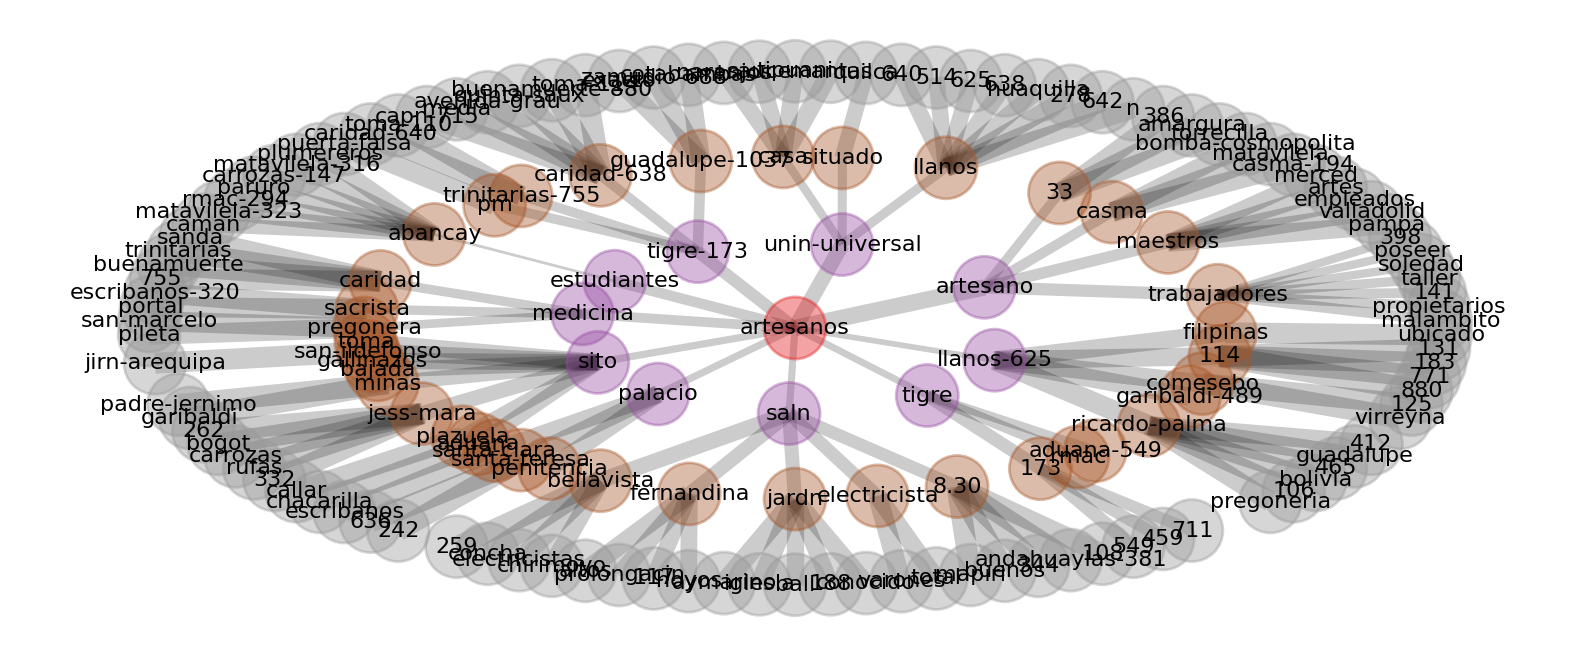

In [66]:
model = models['autos_w2v_sg_2']
graph = sim_tree(model, 'artesanos', top_n=10, max_dist=3)
plot_tree(graph, node_size=500, font_size=8)

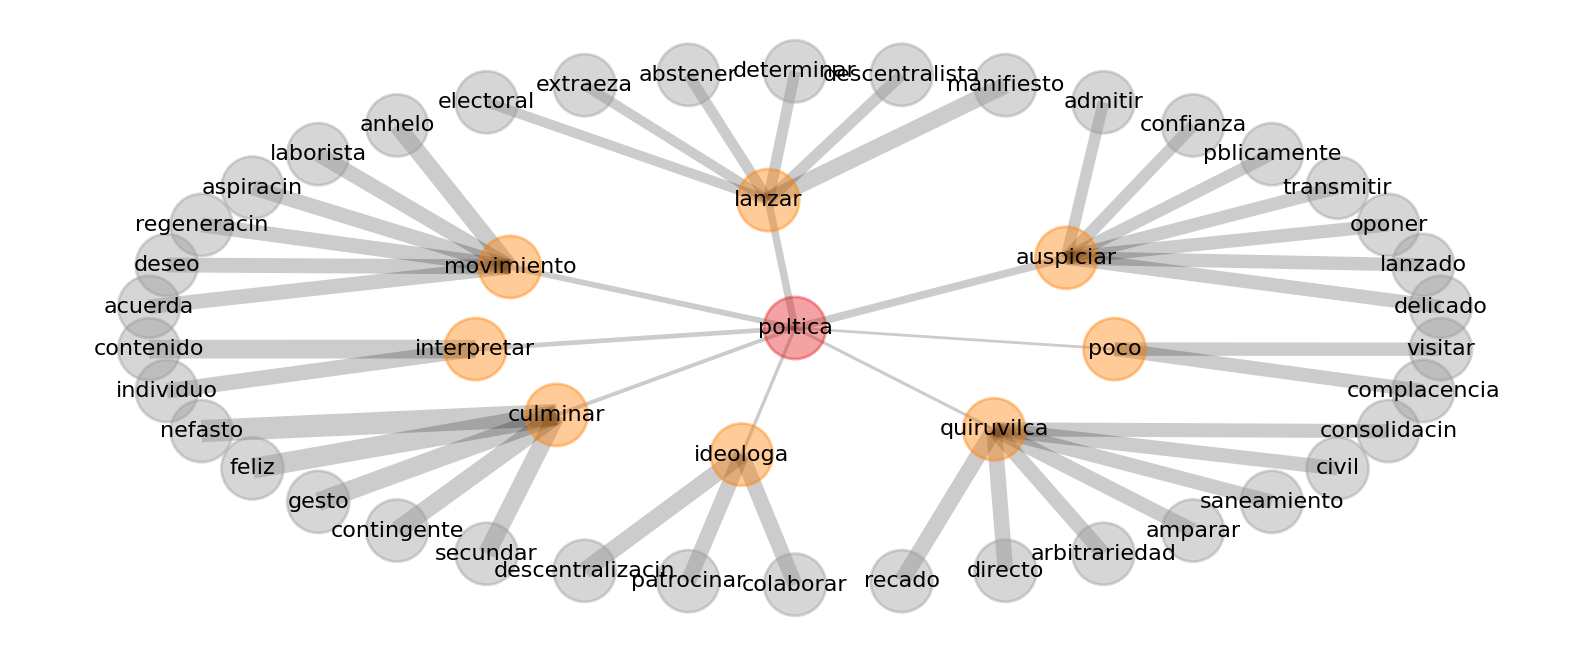

In [85]:
model = models['autos_w2v_sg_30']
graph = sim_tree(model, 'política', top_n=8, max_dist=2)
plot_tree(graph, node_size=500, font_size=8)

# Closing Remarks


# Further Reading
